In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

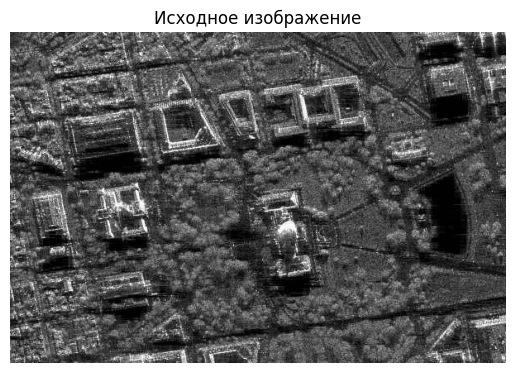

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

# Загрузка изображения в оттенках серого
img = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

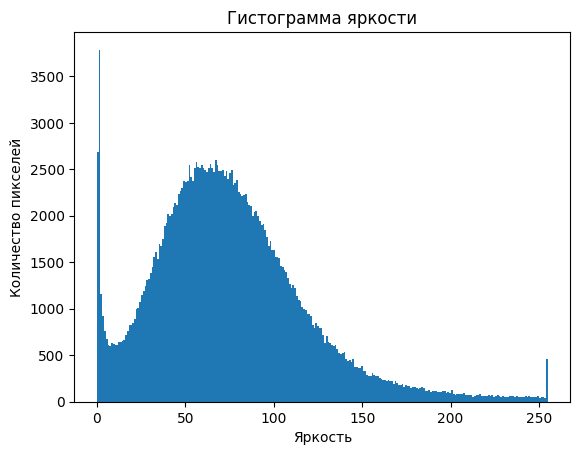

In [9]:
# Простроение гистограммы яркости
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.title('Гистограмма яркости')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')
plt.show()

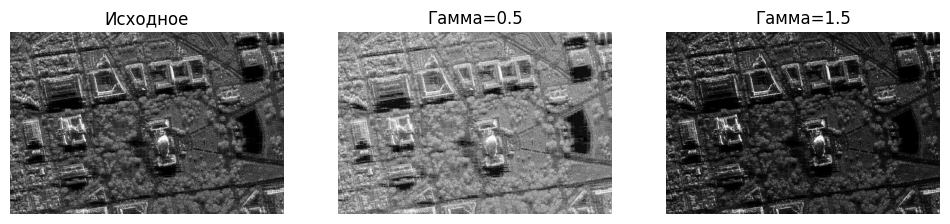

In [11]:
# Реализация гамма-коррекции
def gamma_correction(image, gamma):
    # Нормируем значения от 0 до 1
    norm = image / 255.0
    # Применяем коррекцию
    corrected = np.power(norm, gamma)
    # Возвращаем в диапазон [0,255]
    corrected = np.uint8(corrected * 255)
    return corrected

gamma_low = gamma_correction(img, 0.5)  # γ < 1 — делает ярче
gamma_high = gamma_correction(img, 1.5) # γ > 1 — делает темнее

# Сравнение
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].imshow(img, cmap='gray'); axs[0].set_title('Исходное')
axs[1].imshow(gamma_low, cmap='gray'); axs[1].set_title('Гамма=0.5')
axs[2].imshow(gamma_high, cmap='gray'); axs[2].set_title('Гамма=1.5')
for ax in axs: ax.axis('off')
plt.show()

In [10]:
# Сравнение изображений по MSE и SSIM
def compare_images(img1, img2):
    m = mean_squared_error(img1, img2)
    s = ssim(img1, img2)
    return m, s

mse_low, ssim_low = compare_images(img, gamma_low)
mse_high, ssim_high = compare_images(img, gamma_high)

print(f'Гамма=0.5 → MSE: {mse_low:.2f}, SSIM: {ssim_low:.3f}')
print(f'Гамма=1.5 → MSE: {mse_high:.2f}, SSIM: {ssim_high:.3f}')

Гамма=0.5 → MSE: 3250.43, SSIM: 0.788
Гамма=1.5 → MSE: 971.82, SSIM: 0.807


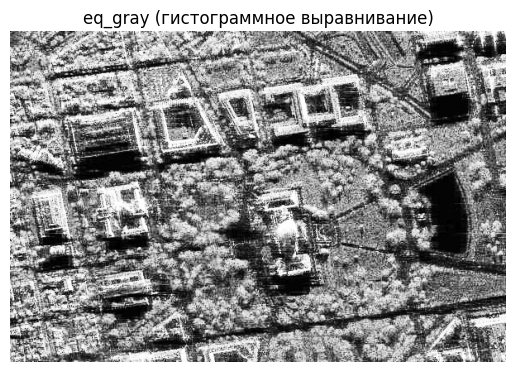

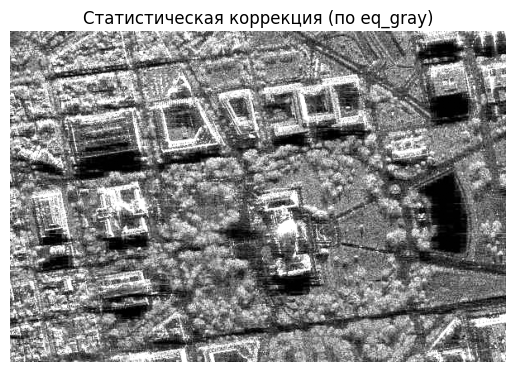

In [12]:
 # Статистическая цветокоррекция на основе eq_gray
eq_gray = cv2.equalizeHist(img)

plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray (гистограммное выравнивание)')
plt.axis('off')
plt.show()

def match_histogram(source, reference):
    src_mean, src_std = source.mean(), source.std()
    ref_mean, ref_std = reference.mean(), reference.std()
    result = (source - src_mean) * (ref_std / src_std) + ref_mean
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

corrected_stat = match_histogram(img, eq_gray)

plt.imshow(corrected_stat, cmap='gray')
plt.title('Статистическая коррекция (по eq_gray)')
plt.axis('off')
plt.show()

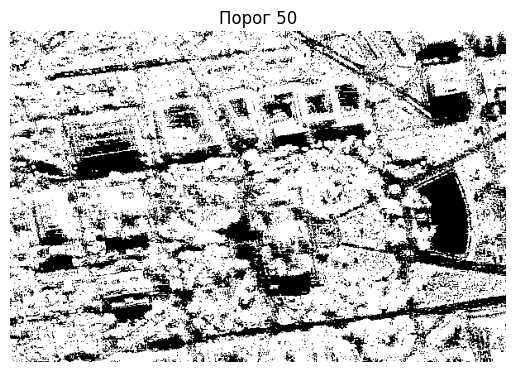

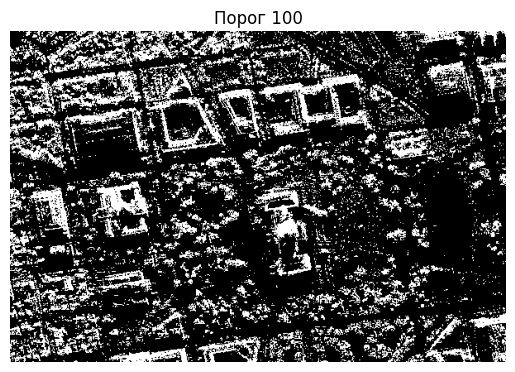

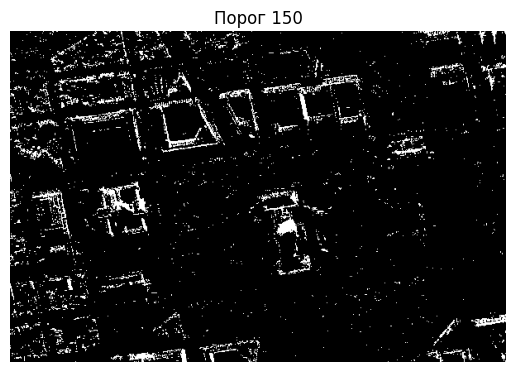

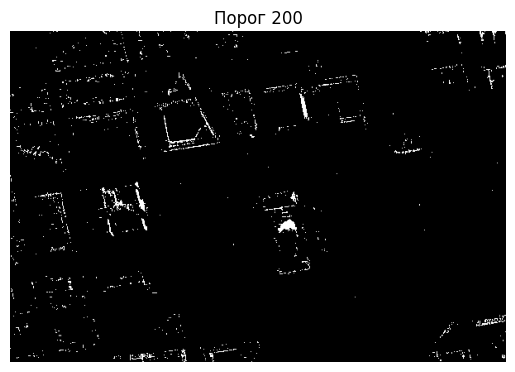

In [14]:
# Пороговая фильтрация
for t in [50, 100, 150, 200]:
    _, th = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    plt.imshow(th, cmap='gray')
    plt.title(f'Порог {t}')
    plt.axis('off')
    plt.show()